### PV

In [2]:
import pv_profil
import matplotlib.pyplot as plt
pv = pv_profil.get_pv_profil(40599, 2014, 10)

C:\Users\n-w\AppData\Local\Temp\ipykernel_14220\590116653.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_axis = pd.date_range(start="00:00", periods=24, freq="H")
C:\Users\n-w\AppData\Local\Temp\ipykernel_14220\590116653.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ax.set_xticks(pd.date_range("00:00", "23:00", freq="3H"))  # Ticks alle 3 Stunden


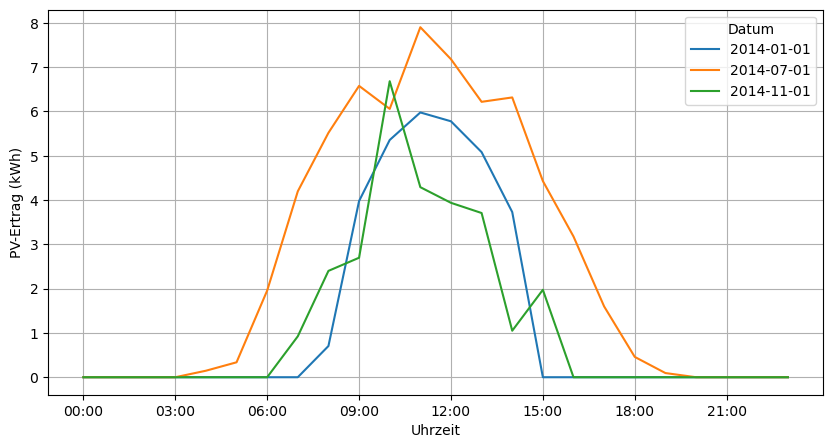

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


plt.rcParams["figure.figsize"] = [10, 5]

# Wähle drei spezifische Tage für den Vergleich
dates = ["2014-01-01", "2014-07-01", "2014-11-01"]  # Ein Tag aus Januar, Mai und August

# Plot erstellen
fig, ax = plt.subplots()

for date in dates:
    df_day = pv.loc[date]  # Daten für den spezifischen Tag auswählen
    df_day = df_day.copy()  # Sicherstellen, dass keine View verändert wird
    
    # Erstelle eine Zeitachse mit Stunden des Tages (00:00 - 23:00)
    time_axis = pd.date_range(start="00:00", periods=24, freq="H")

    ax.plot(time_axis, df_day.values, label=date)  # Plotten mit Zeitachse

# Achsentitel setzen
ax.set_xlabel("Uhrzeit")
ax.set_ylabel("PV-Ertrag (kWh)")
ax.legend(title="Datum")

# X-Achse als Uhrzeit formatieren
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))  # Zeigt Uhrzeit an
ax.set_xticks(pd.date_range("00:00", "23:00", freq="3H"))  # Ticks alle 3 Stunden
plt.grid(True)
plt.show()


### Lastprofile nach VDI 4655

In [5]:
import lastprofile_VDI4655

df = lastprofile_VDI4655.get_lastprofile(27000,4000,1500,200,5,3)

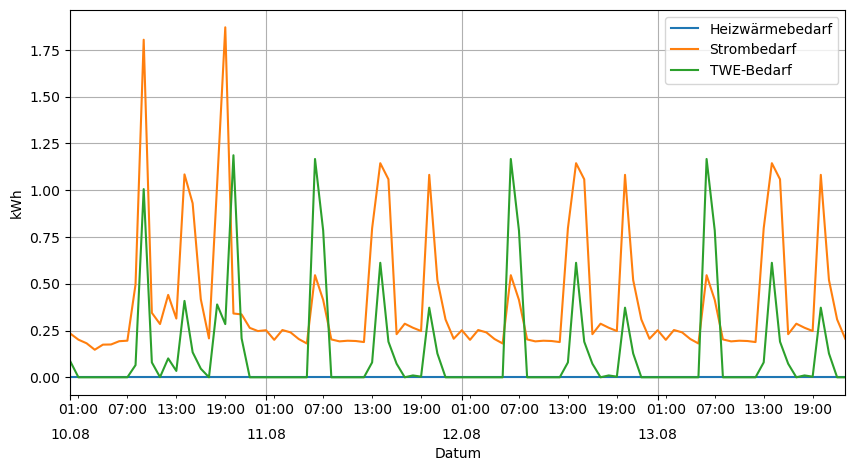

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

# Falls du nur einen bestimmten Zeitraum plotten willst, kannst du hier filtern:
start_date = "2014-08-10"
end_date = "2014-08-13"

df_filtered = df.loc[start_date:end_date]  # Dynamische Auswahl

# Daten plotten
plt.plot(df_filtered.index, df_filtered['Heizwärmebedarf'], label="Heizwärmebedarf")
plt.plot(df_filtered.index, df_filtered['Strombedarf'], label="Strombedarf")
plt.plot(df_filtered.index, df_filtered['Warmwasserbedarf'], label="TWE-Bedarf")

plt.xlabel('Datum', fontsize=10)
plt.ylabel('kWh', fontsize=10)
plt.legend(fontsize=10, loc='best')

# X-Achse anpassen
plt.xticks(fontsize=10)

# Datum-Format anpassen: Nur bei 00:00 Uhr das Datum, sonst nur die Uhrzeit
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(byhour=0))  # Haupt-Ticks nur um 00:00 Uhr
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))  # Format: Tag.Monat

ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Alle 6h eine Nebenmarkierung
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # Uhrzeit anzeigen

# Abstand des Datums nach unten setzen
ax.xaxis.set_tick_params(labelsize=10, pad=20)  # Abstand vergrößern

# Automatische Anpassung der x-Achse basierend auf den Daten
ax.set_xlim([df_filtered.index.min(), df_filtered.index.max()])  # Dynamisch setzen
plt.show()

### berechnen_bs

In [25]:
import berechnen_bs as bs, importlib
importlib.reload(bs)

df_bs = bs.mit_pv(df.copy(), pv, 10, 10)

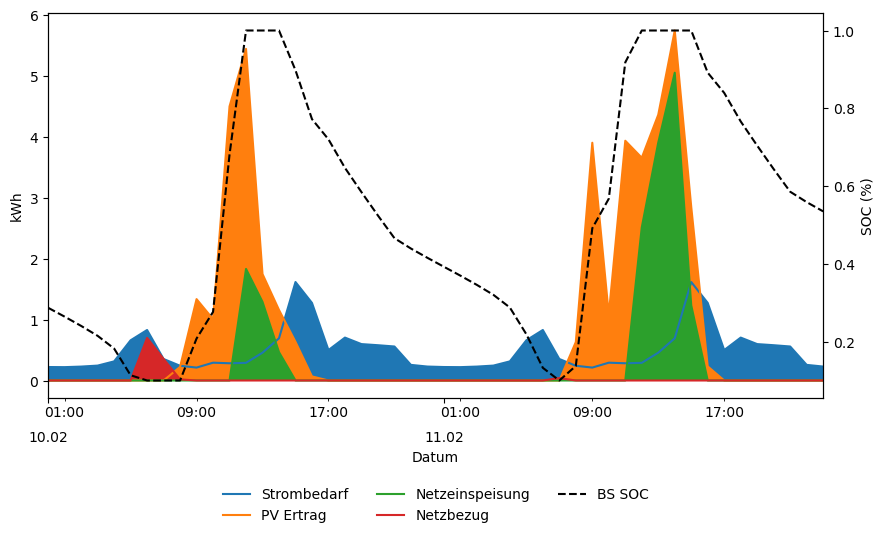

In [84]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = [10, 5]

# Falls du nur einen bestimmten Zeitraum plotten willst, kannst du hier filtern:
start_date = "2014-02-10"
end_date = "2014-02-11"

df_filtered = df_bs.loc[start_date:end_date]  # Dynamische Auswahl

# Haupt-Achse für Energie (kWh)
fig, ax1 = plt.subplots()
# ax1.plot(df_filtered.index, df_filtered['battery_charge'], label="BS-Laden")
ax1.plot(df_filtered.index, df_filtered['Strombedarf'], label="Strombedarf")
ax1.fill_between(df_filtered.index, df_filtered['Strombedarf'])

ax1.plot(df_filtered.index, df_filtered['PV Ertrag'], label="PV Ertrag")
ax1.fill_between(df_filtered.index, df_filtered['PV Ertrag'], alpha=1)

ax1.plot(df_filtered.index, df_filtered['netzeinspeisung'], label="Netzeinspeisung")
ax1.fill_between(df_filtered.index, df_filtered['netzeinspeisung'])

ax1.plot(df_filtered.index, df_filtered['netzbezug'], label="Netzbezug")
ax1.fill_between(df_filtered.index, df_filtered['netzbezug'])

ax1.set_xlabel('Datum', fontsize=10)
ax1.set_ylabel('kWh', fontsize=10)

# X-Achse anpassen
ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=0))  # Haupt-Ticks nur um 00:00 Uhr
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))  # Format: Tag.Monat
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=8))  # Alle 6h eine Nebenmarkierung
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # Uhrzeit anzeigen
ax1.xaxis.set_tick_params(labelsize=10, pad=20)  # Abstand vergrößern
ax1.set_xlim([df_filtered.index.min(), df_filtered.index.max()])  # Dynamisch setzen

# Zweite y-Achse für Battery SOC (%)
ax2 = ax1.twinx()
ax2.plot(df_filtered.index, df_filtered['soc %'], label="BS SOC", color = 'black', linestyle="dashed")
ax2.set_ylabel('SOC (%)', fontsize=10)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=10, loc='upper center',
           bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)

plt.show()


### berechnen_ev und ev profil

In [104]:
# 2 Tage im Februrar EV Profil (Homeoffice = True)
import pandas as pd
ev_profil = pd.read_csv("./Inputs/ev_homeoffice_True_2014.csv")
ev_profil[ev_profil.columns[0]] = pd.to_datetime(ev_profil[ev_profil.columns[0]])
ev_profil= ev_profil.set_index(ev_profil.columns[0])

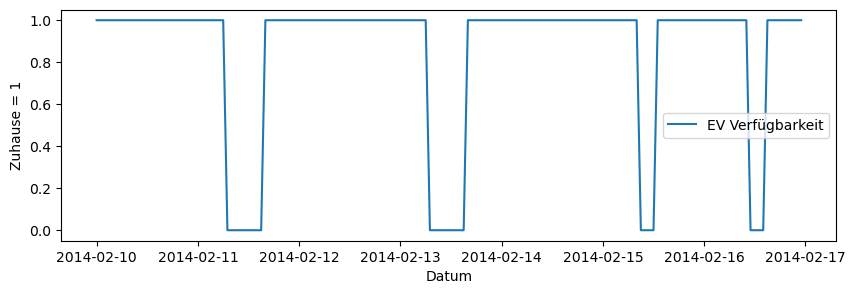

In [129]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 3]

# Falls du nur einen bestimmten Zeitraum plotten willst, kannst du hier filtern:
start_date = "2014-02-10"
end_date = "2014-02-16"

df_filtered = ev_profil.loc[start_date:end_date]  # Dynamische Auswahl

# Daten plotten
plt.plot(df_filtered.index, df_filtered['EV zuhause'], label="EV Verfügbarkeit")

plt.xlabel('Datum', fontsize=10)
plt.ylabel('Zuhause = 1', fontsize=10)
plt.legend(fontsize=10, loc='best')
plt.show()

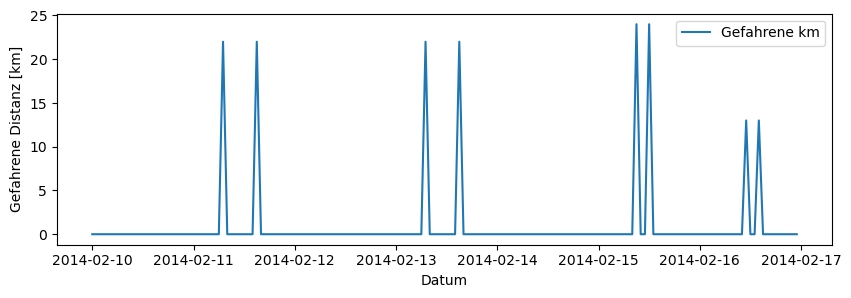

In [130]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 3]

# Falls du nur einen bestimmten Zeitraum plotten willst, kannst du hier filtern:
start_date = "2014-02-10"
end_date = "2014-02-16"

df_filtered = ev_profil.loc[start_date:end_date]  # Dynamische Auswahl

# Daten plotten
plt.plot(df_filtered.index, df_filtered['Distanz'], label="Gefahrene km")

plt.xlabel('Datum', fontsize=10)
plt.ylabel('Gefahrene Distanz [km]', fontsize=10)
plt.legend(fontsize=10, loc='best')
plt.show()

In [14]:
import berechnen_ev as ev, importlib
importlib.reload(ev)

df_ev, df_ev_ohne = ev.mit_hems_bs(df.copy(), pv, 10, True)

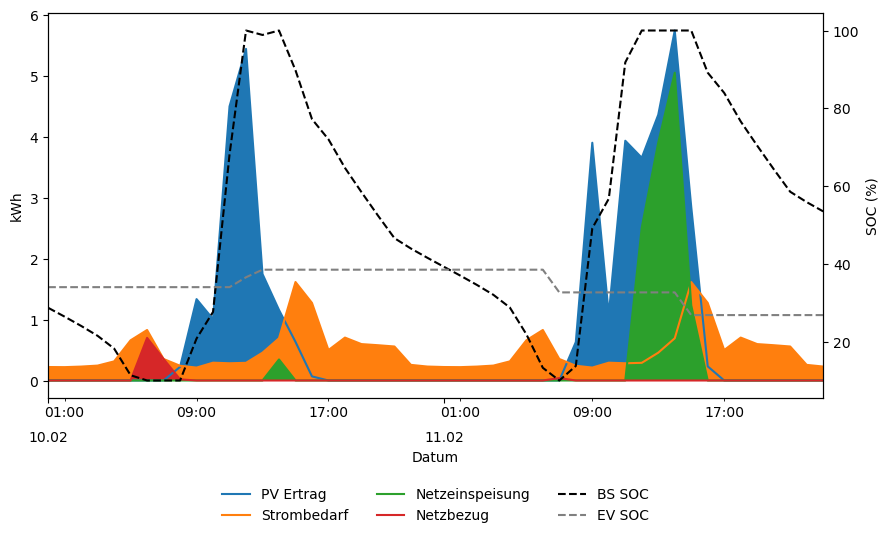

In [94]:
plt.rcParams["figure.figsize"] = [10, 5]

# Falls du nur einen bestimmten Zeitraum plotten willst, kannst du hier filtern:
start_date = "2014-02-10"
end_date = "2014-02-11"

df_filtered = df_ev.loc[start_date:end_date]  # Dynamische Auswahl

# Haupt-Achse für Energie (kWh)
fig, ax1 = plt.subplots()

ax1.plot(df_filtered.index, df_filtered['PV Ertrag'], label="PV Ertrag")
ax1.fill_between(df_filtered.index, df_filtered['PV Ertrag'], alpha=1)

ax1.plot(df_filtered.index, df_filtered['Strombedarf'], label="Strombedarf")
ax1.fill_between(df_filtered.index, df_filtered['Strombedarf'])

ax1.plot(df_filtered.index, df_filtered['einspeisung'], label="Netzeinspeisung")
ax1.fill_between(df_filtered.index, df_filtered['einspeisung'])

ax1.plot(df_filtered.index, df_filtered['netzbezug'], label="Netzbezug")
ax1.fill_between(df_filtered.index, df_filtered['netzbezug'])

ax1.set_xlabel('Datum', fontsize=10)
ax1.set_ylabel('kWh', fontsize=10)

# X-Achse anpassen
ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=0))  # Haupt-Ticks nur um 00:00 Uhr
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))  # Format: Tag.Monat
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=8))  # Alle 6h eine Nebenmarkierung
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # Uhrzeit anzeigen
ax1.xaxis.set_tick_params(labelsize=10, pad=20)  # Abstand vergrößern
ax1.set_xlim([df_filtered.index.min(), df_filtered.index.max()])  # Dynamisch setzen

# Zweite y-Achse für SOC (%)
ax2 = ax1.twinx()
ax2.plot(df_filtered.index, df_filtered['BS %']*100, label="BS SOC", color = 'black', linestyle='--')
ax2.plot(df_filtered.index, df_filtered['EV %']*100, label="EV SOC", color = 'grey', linestyle='--')

ax2.set_ylabel('SOC (%)', fontsize=10)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=10, loc='upper center',
           bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)
plt.show()

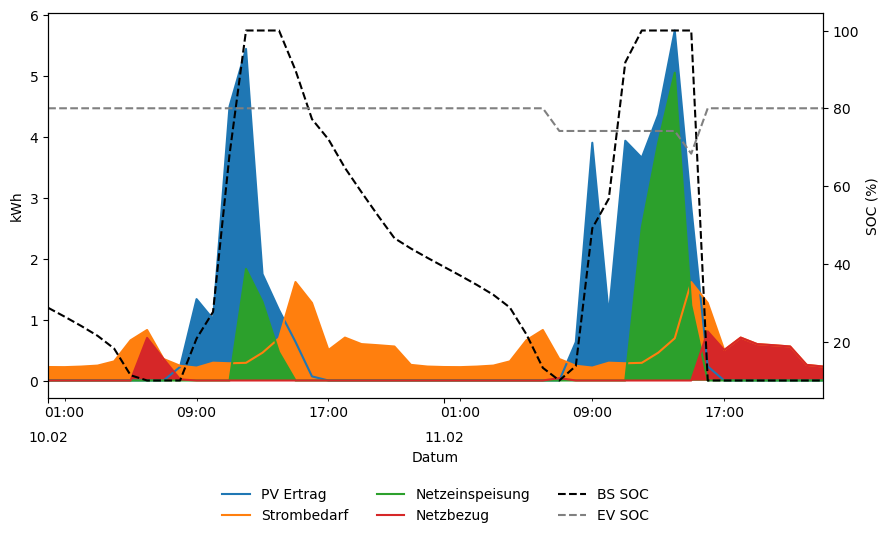

In [98]:
plt.rcParams["figure.figsize"] = [10, 5]

# Falls du nur einen bestimmten Zeitraum plotten willst, kannst du hier filtern:
start_date = "2014-02-10"
end_date = "2014-02-11"

df_filtered = df_ev_ohne.loc[start_date:end_date]  # Dynamische Auswahl

# Haupt-Achse für Energie (kWh)
fig, ax1 = plt.subplots()

ax1.plot(df_filtered.index, df_filtered['PV Ertrag'], label="PV Ertrag")
ax1.fill_between(df_filtered.index, df_filtered['PV Ertrag'], alpha=1)

ax1.plot(df_filtered.index, df_filtered['Strombedarf'], label="Strombedarf")
ax1.fill_between(df_filtered.index, df_filtered['Strombedarf'])

ax1.plot(df_filtered.index, df_filtered['einspeisung'], label="Netzeinspeisung")
ax1.fill_between(df_filtered.index, df_filtered['einspeisung'])

ax1.plot(df_filtered.index, df_filtered['netzbezug'], label="Netzbezug")
ax1.fill_between(df_filtered.index, df_filtered['netzbezug'])

ax1.set_xlabel('Datum', fontsize=10)
ax1.set_ylabel('kWh', fontsize=10)

# X-Achse anpassen
ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=0))  # Haupt-Ticks nur um 00:00 Uhr
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))  # Format: Tag.Monat
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=8))  # Alle 6h eine Nebenmarkierung
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # Uhrzeit anzeigen
ax1.xaxis.set_tick_params(labelsize=10, pad=20)  # Abstand vergrößern
ax1.set_xlim([df_filtered.index.min(), df_filtered.index.max()])  # Dynamisch setzen

# Zweite y-Achse für SOC (%)
ax2 = ax1.twinx()
ax2.plot(df_filtered.index, df_filtered['BS %']*100, label="BS SOC", color = 'black', linestyle='--')
ax2.plot(df_filtered.index, df_filtered['EV %']*100, label="EV SOC", color = 'grey', linestyle='--')

ax2.set_ylabel('SOC (%)', fontsize=10)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=10, loc='upper center',
           bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)
plt.show()

In [16]:
erg = ev.ersparnis_hems_bs(df_ev, df_ev_ohne, 10, 0.358)
ev.print_ersparnis_hems(erg)

Haushaltsstrombedarf in kWh: 4001
EV Strombedarf in kWh: 1967
Gefahrene km: 10448
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 3774
Geladene PV-Strom in Batteriespeicher in kWh: 2032
Geladene PV-Strom in Elektroauto in kWh: 1697
Geladene BS-Strom in Elektroauto in kWh: 52

Mit HEMS
Netzbezug in kWh: 684
Einspeisung ins Netz in kWh: 5836
Einspeisevergütung in €/a: 464.55
Stromkosten mit PV, EV & BS in €/a: 244.87

Ohne HEMS
Netzbezug in kWh: 1718
Einspeisung ins Netz in kWh: 6885
Einspeisevergütung in €/a: 548.05
Stromkosten in €/a: 615.04

Einsparung mit HEMS
Stromkosten Einsparung in €/a: 286.67


### Max. Heizleistung WP

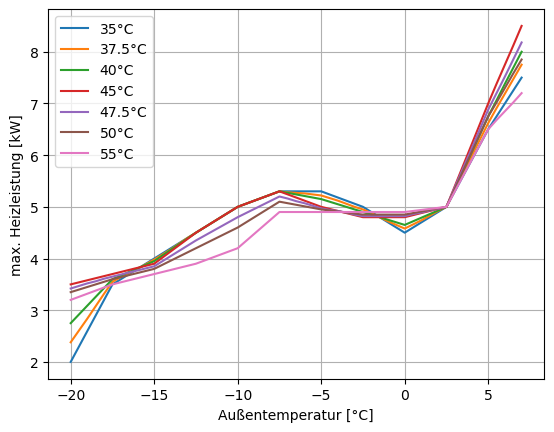

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
wp_groesse = 6
max_hz = pd.read_csv(f'./Inputs/inter_max_Heizleistung_NIBE2040-{wp_groesse}.csv')

plt.plot(max_hz.iloc[:, 0] , max_hz[['35.0','37.5','40.0','45.0','47.5','50.0', '55.0']])
plt.xlabel('Außentemperatur [°C]')
plt.ylabel('max. Heizleistung [kW]')

plt.grid(True)
plt.legend(['35°C','37.5°C','40°C','45°C','47.5°C','50°C', '55°C'])

# Diagramm anzeigen
plt.show()



### WP